In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv("C:/Users/nkhlp/pandas/crime/train.csv")
test = pd.read_csv("C:/Users/nkhlp/pandas/crime/test.csv")
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


C:\Users\nkhlp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


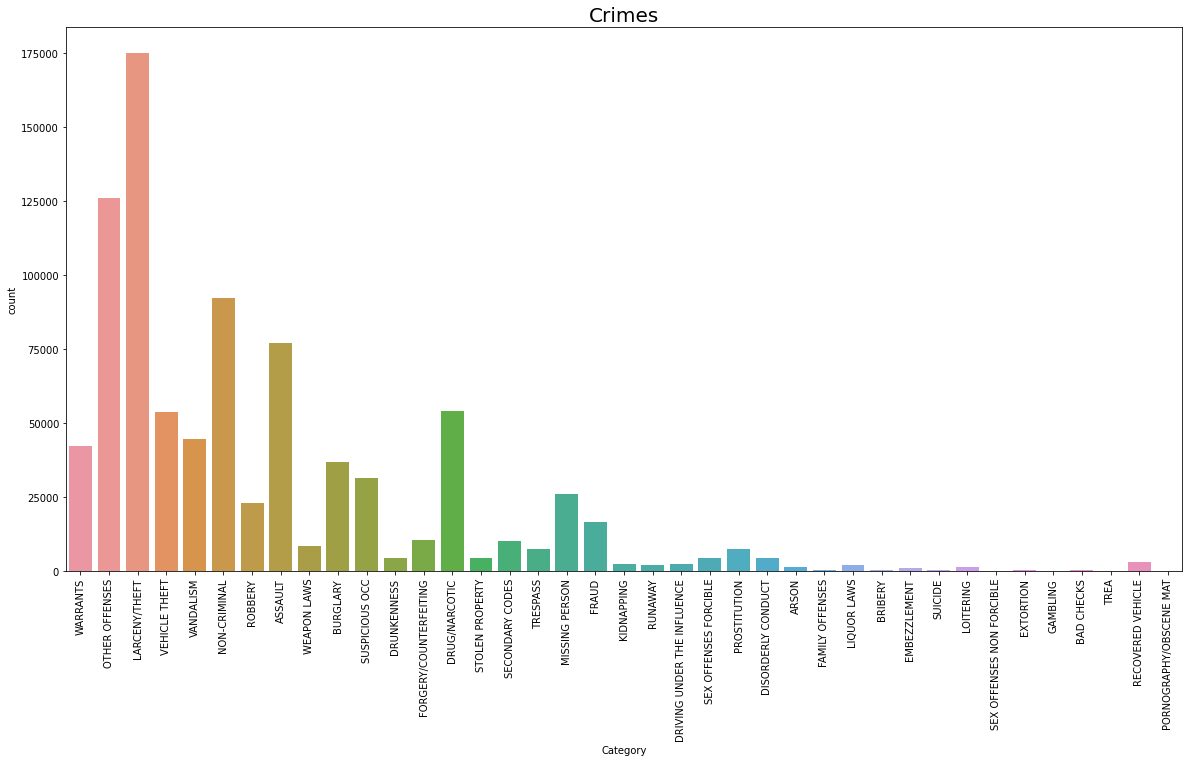

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['Category'])
plt.title('Crimes', fontweight = 40, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SOUTHERN'),
  Text(1, 0, 'MISSION'),
  Text(2, 0, 'NORTHERN'),
  Text(3, 0, 'BAYVIEW'),
  Text(4, 0, 'CENTRAL'),
  Text(5, 0, 'TENDERLOIN'),
  Text(6, 0, 'INGLESIDE'),
  Text(7, 0, 'TARAVAL'),
  Text(8, 0, 'PARK'),
  Text(9, 0, 'RICHMOND')])

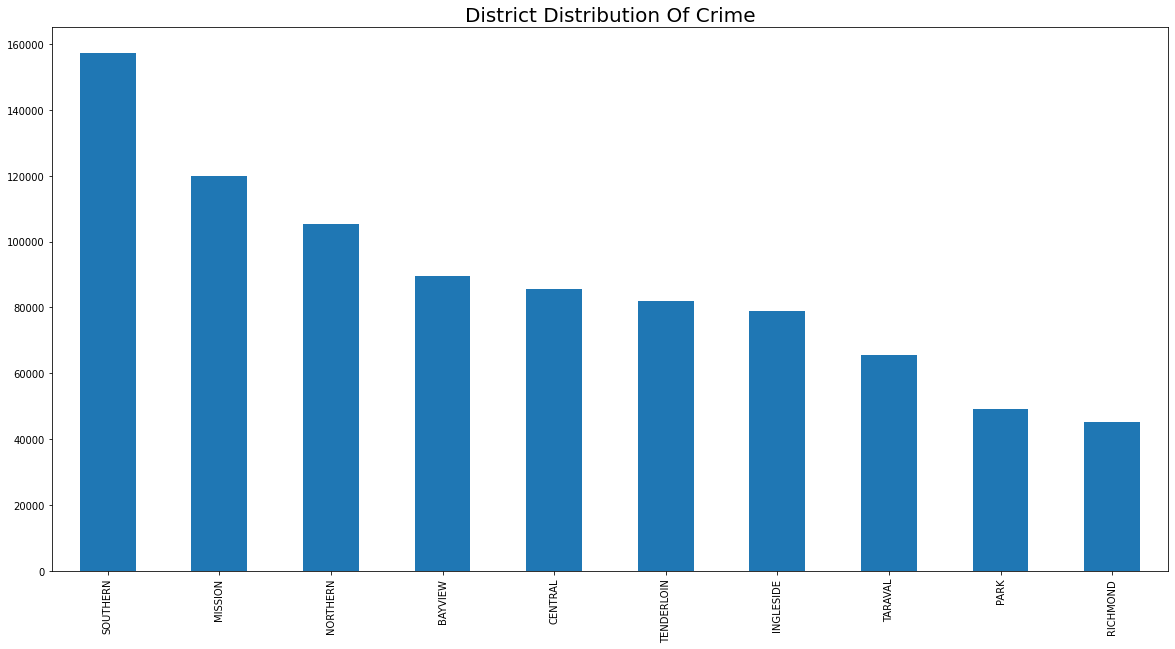

In [5]:
plt.rcParams['figure.figsize'] = (20, 10)
x=train['PdDistrict'].value_counts()
x.plot.bar()
plt.title('District Distribution Of Crime', fontweight = 40, fontsize = 20)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Sunday')])

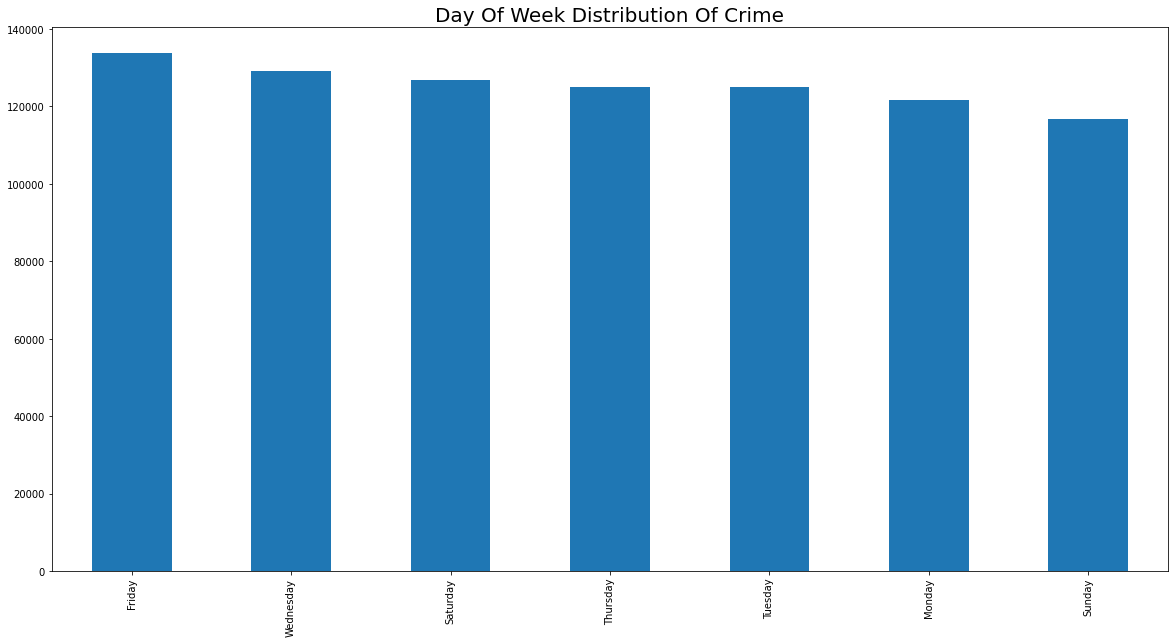

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)
x=train['DayOfWeek'].value_counts()
x.plot.bar()
plt.title('Day Of Week Distribution Of Crime', fontweight = 40, fontsize = 20)
plt.xticks(rotation = 90)

In [7]:
#check for null values
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [8]:
train.drop('Descript', axis=1, inplace=True)
train.drop('Resolution', axis=1, inplace=True)

In [9]:
#working on train
train['Dates']=pd.to_datetime(train['Dates'])
c = preprocessing.LabelEncoder()
crime = c.fit_transform(train.Category)
predict = crime
days = pd.get_dummies(train.DayOfWeek)
dist = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour)
train.drop('Dates', axis=1, inplace=True)

train_new = pd.concat([days, dist], axis=1)


train_new.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [10]:
#working on test
test['Dates']=pd.to_datetime(test['Dates'])
days = pd.get_dummies(test.DayOfWeek)
dist = pd.get_dummies(test.PdDistrict)
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour)




In [11]:
test.drop('Dates',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
test = pd.concat([days, dist], axis=1)

In [12]:
train_new.info

<bound method DataFrame.info of         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0            0       0         0       0         0        0          1   
1            0       0         0       0         0        0          1   
2            0       0         0       0         0        0          1   
3            0       0         0       0         0        0          1   
4            0       0         0       0         0        0          1   
...        ...     ...       ...     ...       ...      ...        ...   
878044       0       1         0       0         0        0          0   
878045       0       1         0       0         0        0          0   
878046       0       1         0       0         0        0          0   
878047       0       1         0       0         0        0          0   
878048       0       1         0       0         0        0          0   

        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
0    

In [13]:
test.info

<bound method DataFrame.info of         Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0            0       0         0       1         0        0          0   
1            0       0         0       1         0        0          0   
2            0       0         0       1         0        0          0   
3            0       0         0       1         0        0          0   
4            0       0         0       1         0        0          0   
...        ...     ...       ...     ...       ...      ...        ...   
884257       0       0         0       0         0        0          1   
884258       0       0         0       0         0        0          1   
884259       0       0         0       0         0        0          1   
884260       0       0         0       0         0        0          1   
884261       0       0         0       0         0        0          1   

        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
0    

In [14]:

X_train, X_test, y_train, y_test = train_test_split(train_new, predict, test_size = 0.25, random_state = 4)


In [15]:

df = RandomForestClassifier(random_state=0, max_depth=5, n_jobs=-1)
df.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [16]:

df = RandomForestClassifier(random_state=0, max_depth=5, n_jobs=-1)
df.fit(train_new,predict)


RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [17]:
final = df.predict_proba(test)


In [18]:
csv=pd.read_csv('C:/Users/nkhlp/pandas/crime/sampleSubmission.csv')

In [19]:
csv.iloc[:,1:] = final
csv.head()
csv.drop(csv.columns[0],axis=1,inplace=True)

In [20]:
csv.to_csv('f.csv')


In [21]:
csv2=pd.read_csv('C:/Users/nkhlp/pandas/crime/f.csv')